# **Programa Principal**

In [1]:
#!pip install pandas -q
#!pip install matplotlib -q
#!pip install seaborn -q
#!pip install db-sqlite3 -q
#!pip install SQLAlchemy -q
#!pip install requests -q
#!pip install jsonlib -q
#!pip install folium


## 1) Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

## 2) Extração de dados

In [3]:
df_janeiro = pd.read_csv('./dados/focos_mensal_br_202401.csv')
df_fevereiro = pd.read_csv('./dados/focos_mensal_br_202402.csv')
df_marco = pd.read_csv('./dados/focos_mensal_br_202403.csv')
df_abril = pd.read_csv('./dados/focos_mensal_br_202404.csv')
df_maio = pd.read_csv('./dados/focos_mensal_br_202405.csv')
df_junho = pd.read_csv('./dados/focos_mensal_br_202406.csv')

In [4]:
#setando o caminho + arquivos que serão concatenados
path = 'dados/focos_mensal_br_2024'

#concatenar os arquivos csv com o nome igual ao setado em "path"
df_brasil_2024 = pd.concat([pd.read_csv(f"{path}{mes:02}.csv") for mes in range(1,7)])

#exibir a tabela concatenada
df_brasil_2024

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


In [5]:
#mostrar quantidade de celulas x colunas
df_brasil_2024.shape

(983232, 16)

In [6]:
#descrever 
df_brasil_2024.describe()

,lat,lon,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,frp
count,983232.000000,983232.000000,9.832320e+05,983232.000000,983232.0,983232.000000,983232.000000,983232.000000,951407.000000
mean,-9.993129,-53.809391,3.189780e+06,31.827838,33.0,9.495614,0.690434,-21.650540,33.780956
std,8.596091,6.936608,1.611532e+06,16.108001,0.0,104.052397,3.708917,147.580664,57.590815
min,-33.715350,-73.666210,1.100015e+06,11.000000,33.0,-999.000000,0.000000,-999.000000,0.000000
25%,-17.497535,-60.026930,1.400472e+06,14.000000,33.0,5.000000,0.000000,0.210000,3.800000
50%,-11.185035,-56.279550,2.922250e+06,29.000000,33.0,14.000000,0.000000,0.770000,9.400000
75%,-2.304890,-48.093350,5.006903e+06,50.000000,33.0,29.000000,0.000000,1.000000,54.200000
max,5.163930,-34.809400,5.300108e+06,53.000000,33.0,93.000000,252.980000,1.000000,4720.700000


### 2.1. Queimadas 2023

`Tratamento dos nomes das Colunas`

In [7]:
#exibir nome das colunas
df_brasil_2024.columns

Index(['id', 'lat', 'lon', 'data_hora_gmt', 'satelite', 'municipio', 'estado',
       'pais', 'municipio_id', 'estado_id', 'pais_id', 'numero_dias_sem_chuva',
       'precipitacao', 'risco_fogo', 'bioma', 'frp'],
      dtype='object')

In [8]:
#renomear colunas
df_brasil_2024.rename(columns={'lat': 'latitude', 'lon': 'longitude'}, inplace=True)

`Tratamento de Null`

In [9]:
#verificando quais colunas possuem valores nulos
df_brasil_2024.isnull().sum()

id                           0
latitude                     0
longitude                    0
data_hora_gmt                0
satelite                     0
municipio                    0
estado                       0
pais                         0
municipio_id                 0
estado_id                    0
pais_id                      0
numero_dias_sem_chuva        0
precipitacao                 0
risco_fogo                   0
bioma                        1
frp                      31825
dtype: int64

In [10]:
df_brasil_2024.fillna('Desconhecido')

,id,latitude,longitude,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


In [11]:
#remover espaços em branco dos nomes das colunas

df_brasil_2024.columns = df_brasil_2024.columns.str.strip()

#remover espaços em branco dos dados das células

df_brasil_2024 = df_brasil_2024.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_brasil_2024

,id,latitude,longitude,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,966ed445-fa70-3369-9802-3e74c5765684,-12.5667,-41.4364,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,8,1.38,0.70,Caatinga,76.5
1,0669c14d-7a39-3d98-9f20-23e118fbcf09,-12.5662,-41.4611,2024-01-01 00:06:16,GOES-16,LENÇÓIS,BAHIA,Brasil,2919306,29,33,9,1.73,0.83,Caatinga,81.4
2,53a46800-fa40-3323-9b20-05108d435c24,-18.0629,-57.3721,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,14.42,0.00,Pantanal,59.8
3,d0af560b-c440-3554-a5c6-83fb055304e8,-18.0823,-57.3902,2024-01-01 00:06:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,63.4
4,b509b339-729d-3a30-a7d9-8a6a33398a4f,-18.0823,-57.3902,2024-01-01 00:16:48,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,0,12.93,-999.00,Pantanal,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.00,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.00,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.00,0.89,Pantanal,68.3


`Exclusão de colunas não utilizadas`

In [12]:
#removendo colunas
df_brasil_2024.drop('frp', axis=1, inplace=True)
df_brasil_2024.drop('id', axis=1, inplace=True)
df_brasil_2024.drop('pais', axis=1, inplace=True)
df_brasil_2024.drop('municipio_id', axis=1, inplace=True)
df_brasil_2024.drop('estado_id', axis=1, inplace=True)
df_brasil_2024.drop('pais_id', axis=1, inplace=True)

`Exclusão de Dados incoerentes`

"Nos downloads de focos do BDQ-Banco de Dados de Queimadas, o atributo "RiscoFogo" dos focos é o valor do Risco de Fogo previsto para o mesmo dia da ocorrência do foco, segundo o método de cálculo descrito em: Método do Cálculo do Risco de Fogo do Programa do INPE. Neste documento você vai notar que os valores são válidos de 0 a 1 e, o número -999 representa valor inválido, normalmente relacionado como área urbana ou corpos d'água, onde não faz sentido calcular o Riso de Fogo."
Disponível em: <https://terrabrasilis.dpi.inpe.br/queimadas/portal/faq/index.html> Pergunta 43

In [13]:
df_brasil_2024.query('risco_fogo != -999', inplace=True)
#df_brasil_2024

## 3) Gráficos

### 3.1. Mapa de calor (Heatmap) de Risco de Fogo

In [14]:
#Diogo
Risk_of_Fire=df_brasil_2024.sort_values(by='risco_fogo',ascending=False)
new_set = Risk_of_Fire.head(25)

In [15]:
#Trasforma valores do dataframe para lista
coordenadas_fogo = new_set[['latitude', 'longitude']].values.tolist()
municipios = new_set[['municipio']].values.tolist()
print(coordenadas_fogo[0:4])
print(municipios[0:4])

[[-11.2401, -44.4728], [-11.9124, -45.4149], [-10.7614, -49.5223], [-18.4195, -49.6013]]
[['SANTA RITA DE CÁSSIA'], ['BARREIRAS'], ['LAGOA DA CONFUSÃO'], ['ITUMBIARA']]


In [16]:
#Utilziando o folium

#Definição de ponto central
F_Mapa = folium.Map([-15.797515,-47.891887],zoom_start=5,control_scale=True)

#Plotagem de marcadores no mapa
for i in range(len(coordenadas_fogo)):
    pontos = coordenadas_fogo[i]
    cid = municipios[i]
    folium.Marker(pontos, popup=cid).add_to(F_Mapa)
F_Mapa



### 3.2. Mapa de precipitação

In [17]:
#Diogo
precipitation_set=df_brasil_2024.sort_values(by='precipitacao',ascending=False)
p_new_set = precipitation_set.head(25)

In [18]:
#Trasforma valores do dataframe para lista
coordenadas_agua = p_new_set[['latitude', 'longitude']].values.tolist()
municipios = p_new_set[['municipio']].values.tolist()
chuva = p_new_set[['precipitacao']].values.tolist()
print(coordenadas_agua[0:4])
print(municipios[0:4])
print(chuva[0:4])

[[-29.50417, -52.48787], [-28.55103, -55.36242], [0.3826, -60.5695], [0.3806, -60.578098]]
[['SINIMBU'], ['SANTO ANTÔNIO DAS MISSÕES'], ['RORAINÓPOLIS'], ['RORAINÓPOLIS']]
[[252.98], [230.9], [157.24], [156.32]]


In [19]:
#Definição de ponto central
P_Mapa = folium.Map([-15.797515,-47.891887],zoom_start=5,control_scale=True)

#Plotagem de marcadores no mapa
for i in range(len(coordenadas_agua)):
    pontos = coordenadas_agua[i]
    cid = municipios[i]
    agua = chuva[i]
    folium.Marker(pontos, popup=(cid,agua)).add_to(P_Mapa)
P_Mapa

### 3.3. Gráfico de Linha para Número de Dias sem Chuva

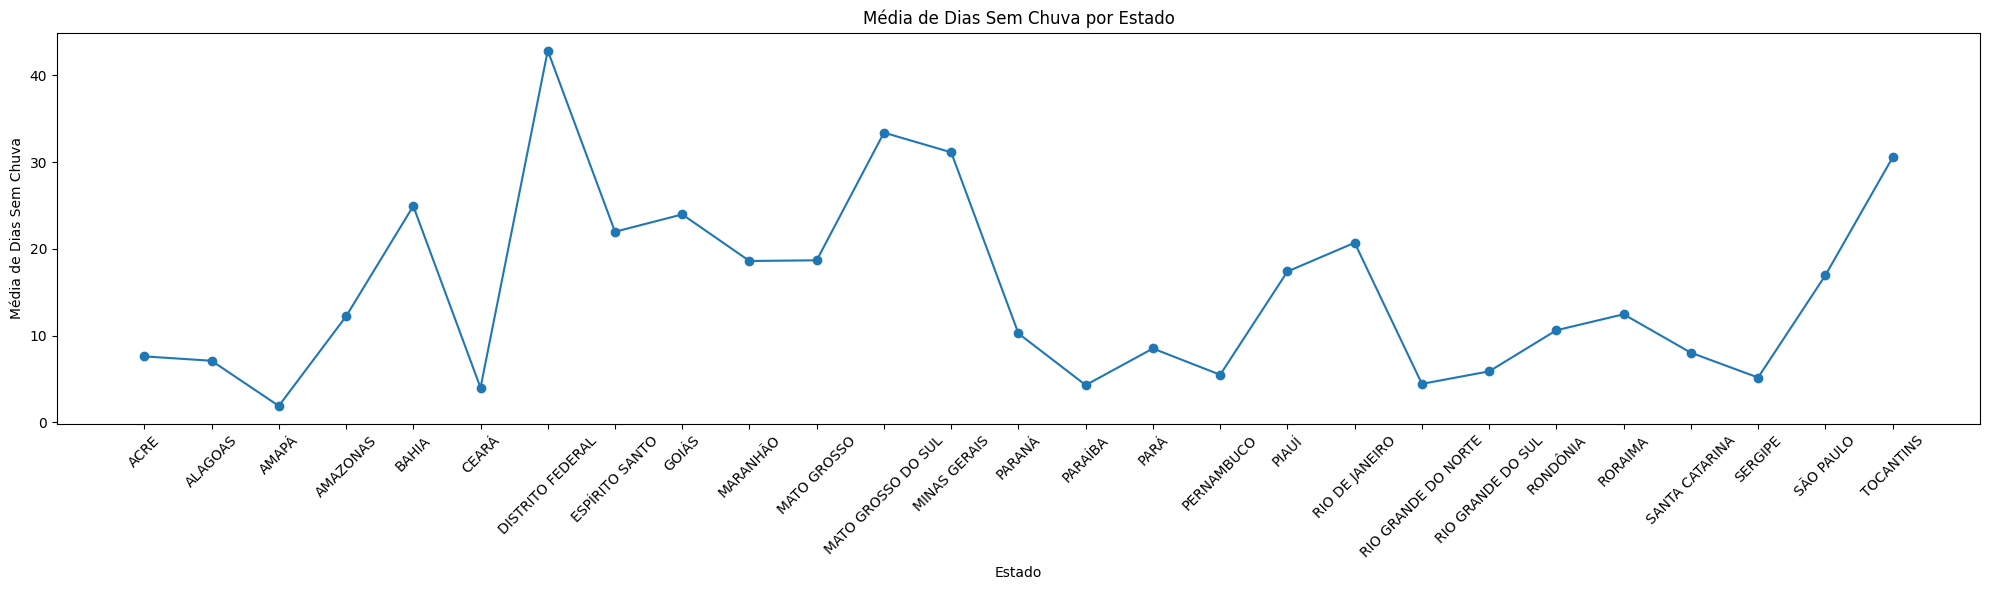

In [20]:
#filtrar apenas os dias com resultados positivos
df_filtrado = df_brasil_2024[df_brasil_2024['numero_dias_sem_chuva'] >= 0]

#agrupar por estado e tirar a média dos dias
df_agrupado = df_filtrado.groupby('estado')['numero_dias_sem_chuva'].mean().reset_index()

#plotar o gráfico
plt.figure(figsize=(20, 6))
plt.plot(df_agrupado['estado'], df_agrupado['numero_dias_sem_chuva'], marker='o')

#adicionar um titulo e os rótulos, além de nomear
plt.title('Média de Dias Sem Chuva por Estado')
plt.xlabel('Estado')
plt.ylabel('Média de Dias Sem Chuva')

#deixar os rótulos na diagonal
plt.xticks(rotation=45)

#ajustar o layout
plt.tight_layout()
plt.show()


### 3.4. Gráfico de Dispersão (Scatter Plot)

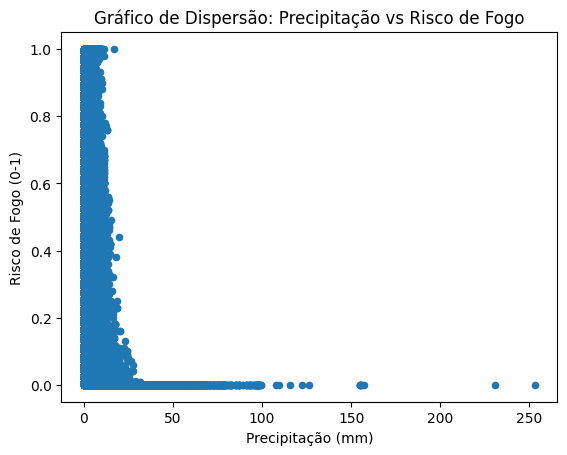

In [21]:
df_brasil_2024.plot(
    kind='scatter', 
    x='precipitacao', 
    y='risco_fogo',
    ylabel='Risco de Fogo (0-1)', 
    xlabel='Precipitação (mm)', 
    title='Gráfico de Dispersão: Precipitação vs Risco de Fogo');

**Explicação**: 
- A precipitação é um fator que influencia significativamente a redução do risco de fogo;
- Quanto maior o nível de precipitação, menor é o risco de fogo e vice-versa;
- Portanto, há uma correlação inversa entre o Risco de fogo e a precipitação

### 3.5. Análise Temporal

SUL

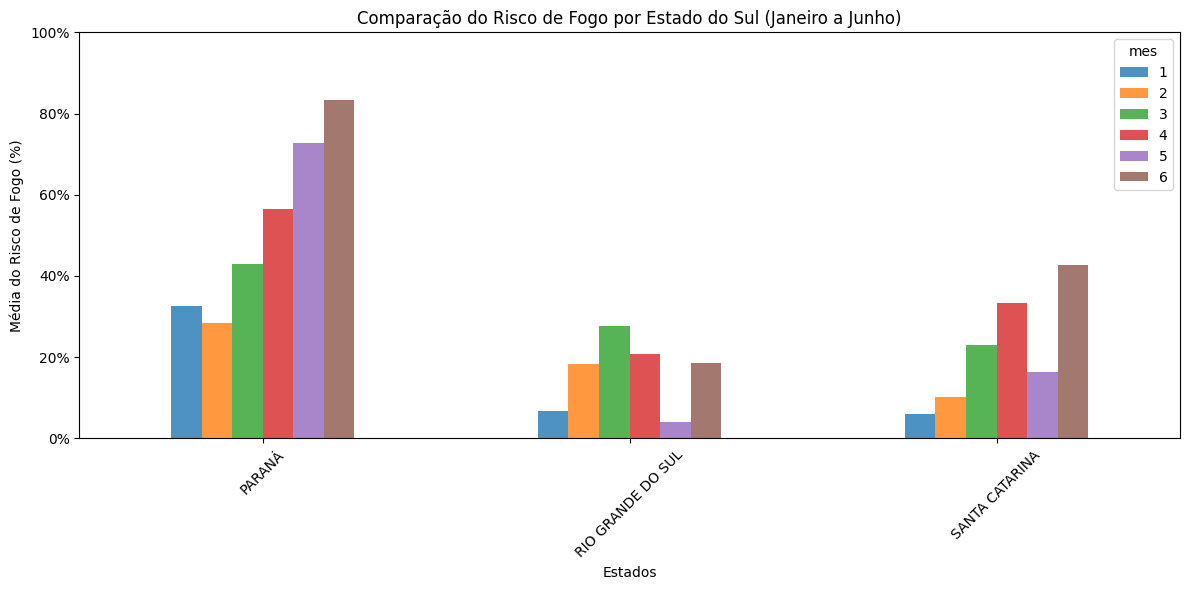

In [34]:
def Historograma_Risco_de_incendio (regiao):

    # Setando o caminho do arquivo
    path = 'dados/focos_mensal_br_2024'
    
    # Inicializando uma lista para armazenar os DataFrames
    df_list = []
    
    # Loop para ler e combinar os dados de janeiro a junho
    for mes in range(1, 7):
        arquivo = f"{path}{mes:02}.csv"
        
        # Verificando se o arquivo existe
        if os.path.exists(arquivo):
            # Lendo o arquivo CSV para o mês selecionado
            df_mes = pd.read_csv(arquivo)
            
            # Remover valores -999 da coluna 'risco_fogo'
            df_mes = df_mes[df_mes['risco_fogo'] != -999]
            
            # Adicionar uma coluna de mês
            df_mes['mes'] = mes
            
            # Adicionando o DataFrame à lista
            df_list.append(df_mes)
        else:
            print(f"O arquivo {arquivo} não foi encontrado.")
    
    # Concatenar todos os DataFrames em um único DataFrame
    df_brasil_2024 = pd.concat(df_list, ignore_index=True)
    
    # Filtrar os estados da região Sul
    regiao
    municipios = df_brasil_2024[df_brasil_2024['estado'].isin(regiao)][['risco_fogo', 'estado', 'mes']]
    
    # Calcular a média do risco de fogo por estado e mês
    media_risco_estado_mes = municipios.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()
    
    # Converter os valores de risco de fogo para porcentagem
    media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100
    
    # Pivotar a tabela para facilitar a plotagem
    pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')
    
    # Criar o gráfico de barras
    plt.figure(figsize=(12, 6))  # Tamanho da figura
    
    # Criar o histograma
    pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)
    
    # Adicionar título e rótulos aos eixos
    plt.title('Comparação do Risco de Fogo por Estado do Sul (Janeiro a Junho)')
    plt.xlabel('Estados')
    plt.ylabel('Média do Risco de Fogo (%)')
    
    # Rotacionar os rótulos do eixo x
    plt.xticks(rotation=45)
    
    # Configurar o eixo y para mostrar porcentagens
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
    
    # Ajustar o limite do eixo y para uma melhor visualização
    plt.ylim(0, 100)  # limitar a 100%
    
    # Ajustar layout para evitar sobreposição
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

estados_sul = ['PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']

Historograma_Risco_de_incendio(estados_sul)

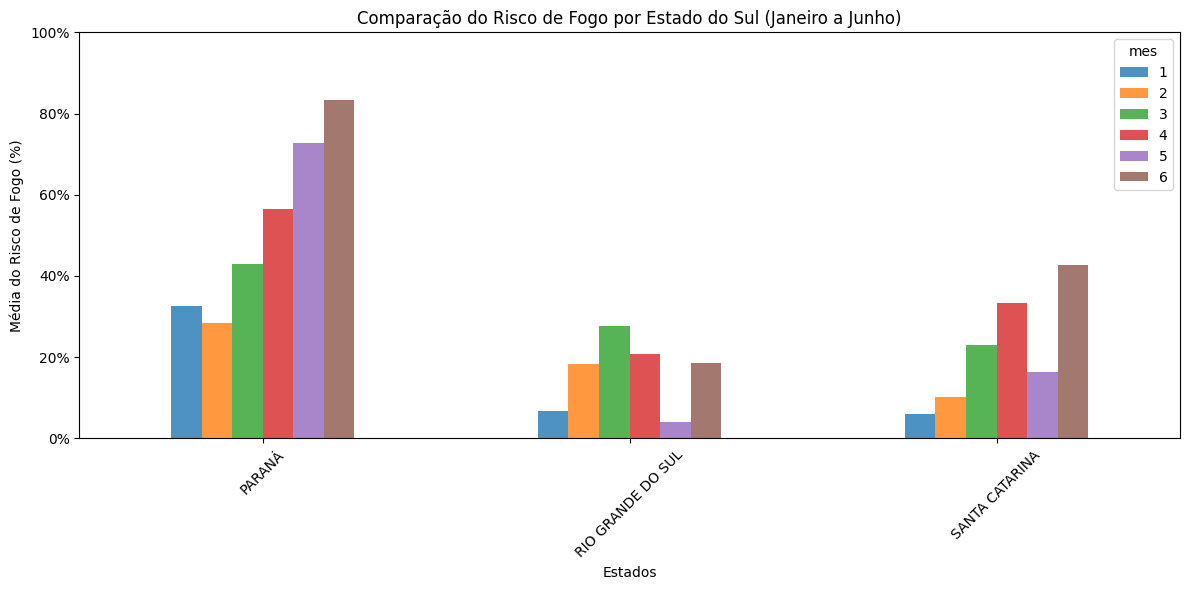

In [22]:
# Setando o caminho do arquivo
path = 'dados/focos_mensal_br_2024'

# Inicializando uma lista para armazenar os DataFrames
df_list = []

# Loop para ler e combinar os dados de janeiro a junho
for mes in range(1, 7):
    arquivo = f"{path}{mes:02}.csv"
    
    # Verificando se o arquivo existe
    if os.path.exists(arquivo):
        # Lendo o arquivo CSV para o mês selecionado
        df_mes = pd.read_csv(arquivo)
        
        # Remover valores -999 da coluna 'risco_fogo'
        df_mes = df_mes[df_mes['risco_fogo'] != -999]
        
        # Adicionar uma coluna de mês
        df_mes['mes'] = mes
        
        # Adicionando o DataFrame à lista
        df_list.append(df_mes)
    else:
        print(f"O arquivo {arquivo} não foi encontrado.")

# Concatenar todos os DataFrames em um único DataFrame
df_brasil_2024 = pd.concat(df_list, ignore_index=True)

# Filtrar os estados da região Sul
estados_sul = ['PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']
sul_municipios = df_brasil_2024[df_brasil_2024['estado'].isin(estados_sul)][['risco_fogo', 'estado', 'mes']]

# Calcular a média do risco de fogo por estado e mês
media_risco_estado_mes = sul_municipios.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()

# Converter os valores de risco de fogo para porcentagem
media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100

# Pivotar a tabela para facilitar a plotagem
pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Criar o histograma
pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)

# Adicionar título e rótulos aos eixos
plt.title('Comparação do Risco de Fogo por Estado do Sul (Janeiro a Junho)')
plt.xlabel('Estados')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100)  # limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


SUDESTE

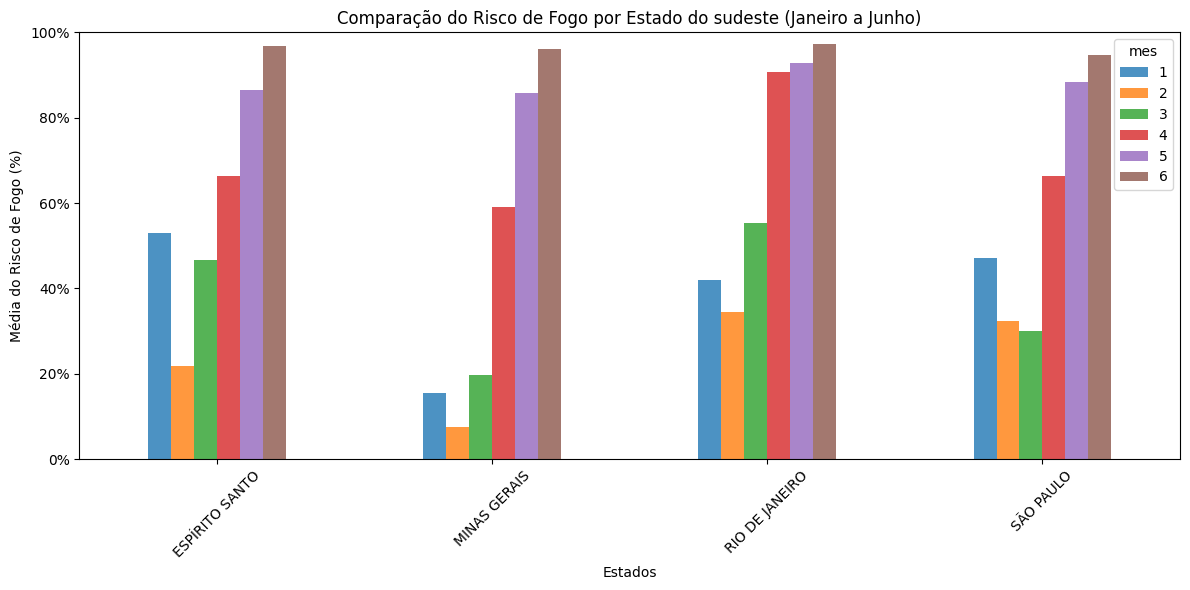

In [23]:
# Setando o caminho do arquivo
path = 'dados/focos_mensal_br_2024'

# Inicializando uma lista para armazenar os DataFrames
df_list = []

# Loop para ler e combinar os dados de janeiro a junho
for mes in range(1, 7):
    arquivo = f"{path}{mes:02}.csv"
    
    # Verificando se o arquivo existe
    if os.path.exists(arquivo):
        # Lendo o arquivo CSV para o mês selecionado
        df_mes = pd.read_csv(arquivo)
        
        # Remover valores -999 da coluna 'risco_fogo'
        df_mes = df_mes[df_mes['risco_fogo'] != -999]
        
        # Adicionar uma coluna de mês
        df_mes['mes'] = mes
        
        # Adicionando o DataFrame à lista
        df_list.append(df_mes)
    else:
        print(f"O arquivo {arquivo} não foi encontrado.")

# Concatenar todos os DataFrames em um único DataFrame
df_brasil_2024 = pd.concat(df_list, ignore_index=True)

# Filtrar os estados da região Sul
estados_sudeste = ['MINAS GERAIS', 'SÃO PAULO', 'RIO DE JANEIRO', 'ESPÍRITO SANTO']
sudeste_municipios = df_brasil_2024[df_brasil_2024['estado'].isin(estados_sudeste)][['risco_fogo', 'estado', 'mes']]

# Calcular a média do risco de fogo por estado e mês
media_risco_estado_mes = sudeste_municipios.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()

# Converter os valores de risco de fogo para porcentagem
media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100

# Pivotar a tabela para facilitar a plotagem
pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Criar o histograma
pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)

# Adicionar título e rótulos aos eixos
plt.title('Comparação do Risco de Fogo por Estado do sudeste (Janeiro a Junho)')
plt.xlabel('Estados')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100)  # limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


CENTRO-OESTE

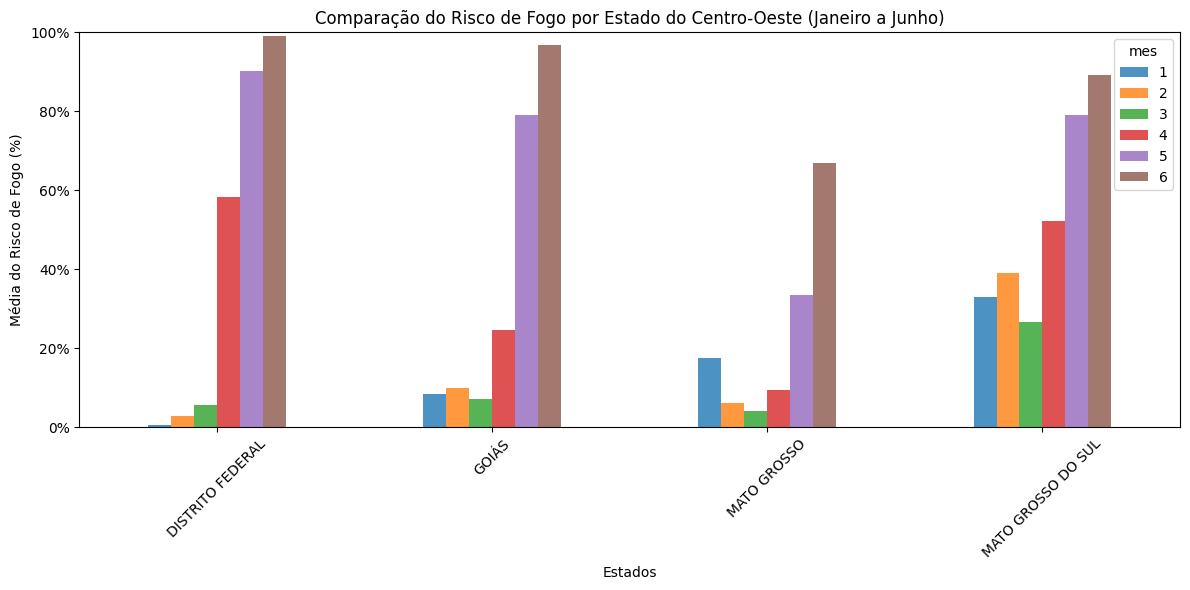

In [24]:
# Setando o caminho do arquivo
path = 'dados/focos_mensal_br_2024'

# Inicializando uma lista para armazenar os DataFrames
df_list = []

# Loop para ler e combinar os dados de janeiro a junho
for mes in range(1, 7):
    arquivo = f"{path}{mes:02}.csv"
    
    # Verificando se o arquivo existe
    if os.path.exists(arquivo):
        # Lendo o arquivo CSV para o mês selecionado
        df_mes = pd.read_csv(arquivo)
        
        # Remover valores -999 da coluna 'risco_fogo'
        df_mes = df_mes[df_mes['risco_fogo'] != -999]
        
        # Adicionar uma coluna de mês
        df_mes['mes'] = mes
        
        # Adicionando o DataFrame à lista
        df_list.append(df_mes)
    else:
        print(f"O arquivo {arquivo} não foi encontrado.")

# Concatenar todos os DataFrames em um único DataFrame
df_brasil_2024 = pd.concat(df_list, ignore_index=True)

# Filtrar os estados da região Sul
estados_centro = ['GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'DISTRITO FEDERAL']
sudeste_centro = df_brasil_2024[df_brasil_2024['estado'].isin(estados_centro)][['risco_fogo', 'estado', 'mes']]

# Calcular a média do risco de fogo por estado e mês
media_risco_estado_mes = sudeste_centro.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()

# Converter os valores de risco de fogo para porcentagem
media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100

# Pivotar a tabela para facilitar a plotagem
pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Criar o histograma
pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)

# Adicionar título e rótulos aos eixos
plt.title('Comparação do Risco de Fogo por Estado do Centro-Oeste (Janeiro a Junho)')
plt.xlabel('Estados')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100)  # limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


NORTE

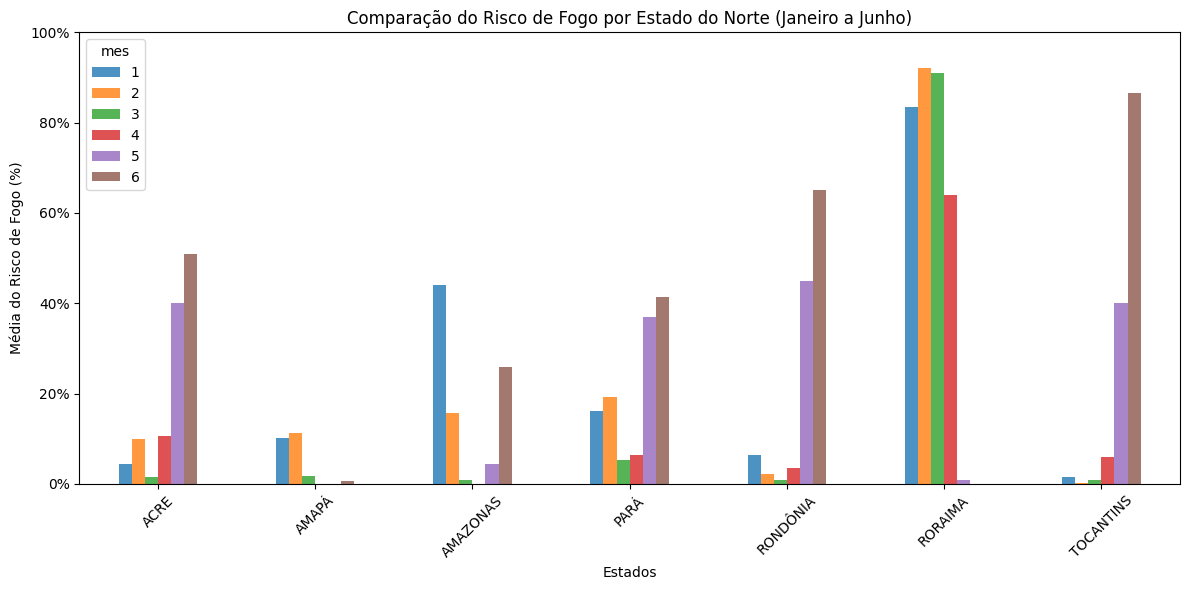

In [25]:
# Setando o caminho do arquivo
path = 'dados/focos_mensal_br_2024'

# Inicializando uma lista para armazenar os DataFrames
df_list = []

# Loop para ler e combinar os dados de janeiro a junho
for mes in range(1, 7):
    arquivo = f"{path}{mes:02}.csv"
    
    # Verificando se o arquivo existe
    if os.path.exists(arquivo):
        # Lendo o arquivo CSV para o mês selecionado
        df_mes = pd.read_csv(arquivo)
        
        # Remover valores -999 da coluna 'risco_fogo'
        df_mes = df_mes[df_mes['risco_fogo'] != -999]
        
        # Adicionar uma coluna de mês
        df_mes['mes'] = mes
        
        # Adicionando o DataFrame à lista
        df_list.append(df_mes)
    else:
        print(f"O arquivo {arquivo} não foi encontrado.")

# Concatenar todos os DataFrames em um único DataFrame
df_brasil_2024 = pd.concat(df_list, ignore_index=True)

# Filtrar os estados da região Sul
estados_norte = ['ACRE', 'AMAPÁ', 'AMAZONAS', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS']
sudeste_norte = df_brasil_2024[df_brasil_2024['estado'].isin(estados_norte)][['risco_fogo', 'estado', 'mes']]

# Calcular a média do risco de fogo por estado e mês
media_risco_estado_mes = sudeste_norte.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()

# Converter os valores de risco de fogo para porcentagem
media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100

# Pivotar a tabela para facilitar a plotagem
pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Criar o histograma
pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)

# Adicionar título e rótulos aos eixos
plt.title('Comparação do Risco de Fogo por Estado do Norte (Janeiro a Junho)')
plt.xlabel('Estados')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100)  # limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


NORDESTE

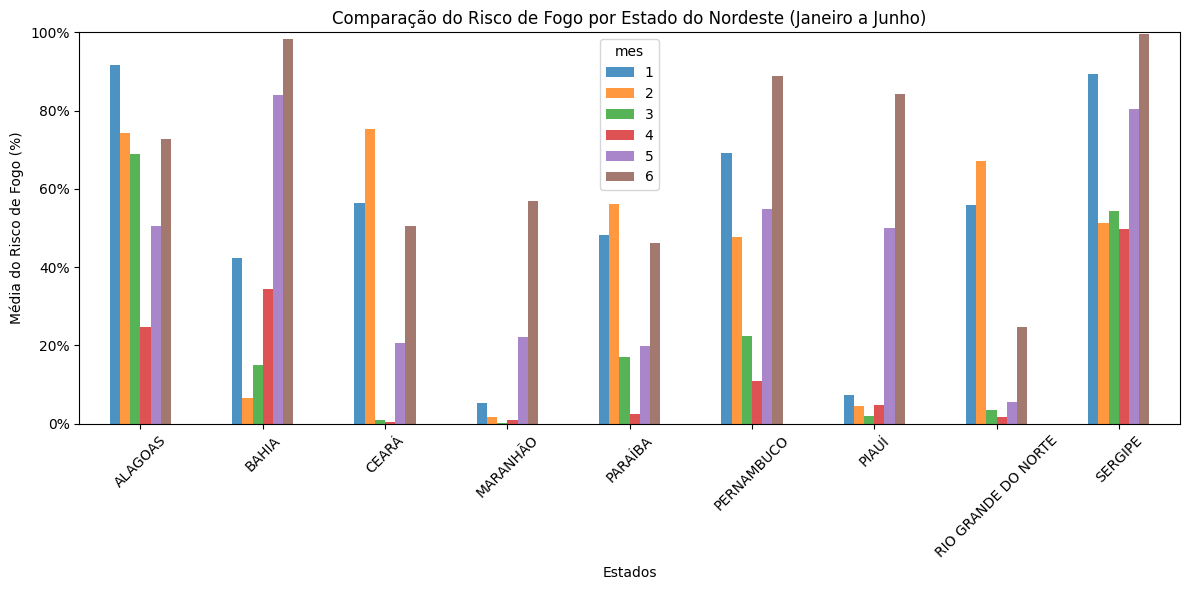

In [26]:
# Setando o caminho do arquivo
path = 'dados/focos_mensal_br_2024'

# Inicializando uma lista para armazenar os DataFrames
df_list = []

# Loop para ler e combinar os dados de janeiro a junho
for mes in range(1, 7):
    arquivo = f"{path}{mes:02}.csv"
    
    # Verificando se o arquivo existe
    if os.path.exists(arquivo):
        # Lendo o arquivo CSV para o mês selecionado
        df_mes = pd.read_csv(arquivo)
        
        # Remover valores -999 da coluna 'risco_fogo'
        df_mes = df_mes[df_mes['risco_fogo'] != -999]
        
        # Adicionar uma coluna de mês
        df_mes['mes'] = mes
        
        # Adicionando o DataFrame à lista
        df_list.append(df_mes)
    else:
        print(f"O arquivo {arquivo} não foi encontrado.")

# Concatenar todos os DataFrames em um único DataFrame
df_brasil_2024 = pd.concat(df_list, ignore_index=True)

# Filtrar os estados da região Sul
estados_nordeste = ['ALAGOAS', 'BAHIA', 'CEARÁ', 'MARANHÃO', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'RIO GRANDE DO NORTE', 'SERGIPE']
sudeste_nordeste = df_brasil_2024[df_brasil_2024['estado'].isin(estados_nordeste)][['risco_fogo', 'estado', 'mes']]

# Calcular a média do risco de fogo por estado e mês
media_risco_estado_mes = sudeste_nordeste.groupby(['estado', 'mes'])['risco_fogo'].mean().reset_index()

# Converter os valores de risco de fogo para porcentagem
media_risco_estado_mes['risco_fogo'] = media_risco_estado_mes['risco_fogo'].abs() * 100

# Pivotar a tabela para facilitar a plotagem
pivot_table = media_risco_estado_mes.pivot(index='estado', columns='mes', values='risco_fogo')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Criar o histograma
pivot_table.plot(kind='bar', ax=plt.gca(), alpha=0.8)

# Adicionar título e rótulos aos eixos
plt.title('Comparação do Risco de Fogo por Estado do Nordeste (Janeiro a Junho)')
plt.xlabel('Estados')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100)  # limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()



### 3.6. Boxplot de Precipitação por Estado/Município:

In [27]:
# Alessandra

### 3.7. Gráfico de Barras Comparativo

In [28]:
#Diana

### 3.8. Histogramas

In [29]:
#Thiago

### 3.9. Gráficos de Satélites

In [30]:
#Alessandra